In [109]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random

In [12]:
l01 = cv2.imread('../datasets/tp6_imovi/L01.png')
r02 = cv2.imread('../datasets/tp6_imovi/R02.png')
""" cv2.imshow('l01', l01)
cv2.waitKey(0)
cv2.imshow('r02', r02)
cv2.waitKey(0)
cv2.destroyAllWindows() """

" cv2.imshow('l01', l01)\ncv2.waitKey(0)\ncv2.imshow('r02', r02)\ncv2.waitKey(0)\ncv2.destroyAllWindows() "

In [13]:
s = cv2.SIFT_create()

In [14]:
keypoints_l01 = s.detect(l01)
keypoints_r02 = s.detect(r02)

In [ ]:
cv2.drawKeypoints(l01, keypoints_l01, l01)
cv2.imshow('keypoints', l01)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
kp_l01, desc_l01 = s.detectAndCompute(l01, None)
kp_r02, desc_r02 = s.detectAndCompute(r02, None)

In [18]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

In [19]:
matches = bf.match(desc_l01,desc_r02)

In [20]:
print(matches)

(< cv2.DMatch 0000028E1EA0E790>, < cv2.DMatch 0000028E1EA0E410>, < cv2.DMatch 0000028E1EA0EB30>, < cv2.DMatch 0000028E1EA0EBF0>, < cv2.DMatch 0000028E1EA0E770>, < cv2.DMatch 0000028E1EA0E590>, < cv2.DMatch 0000028E1EA0E5B0>, < cv2.DMatch 0000028E1EA0E6D0>, < cv2.DMatch 0000028E1EA0E450>, < cv2.DMatch 0000028E1EA0E690>, < cv2.DMatch 0000028E1EA0ED50>, < cv2.DMatch 0000028E1EA0E730>, < cv2.DMatch 0000028E1EA0E3D0>, < cv2.DMatch 0000028E1EA0E750>, < cv2.DMatch 0000028E1EA0EED0>, < cv2.DMatch 0000028E1EA0E370>, < cv2.DMatch 0000028E1EA0EF10>, < cv2.DMatch 0000028E1EA0E9D0>, < cv2.DMatch 0000028E1EA0E7B0>, < cv2.DMatch 0000028E1EA0E7D0>, < cv2.DMatch 0000028E1EA0E7F0>, < cv2.DMatch 0000028E1EA0E8B0>, < cv2.DMatch 0000028E1EA0E830>, < cv2.DMatch 0000028E1EA0E870>, < cv2.DMatch 0000028E1EA0E850>, < cv2.DMatch 0000028E1EA0E890>, < cv2.DMatch 0000028E1EA0E8D0>, < cv2.DMatch 0000028E1EA0E8F0>, < cv2.DMatch 0000028E1EA0E910>, < cv2.DMatch 0000028E1EA0E930>, < cv2.DMatch 0000028E1EA0E950>, < cv2.D

(-0.5, 2483.5, 374.5, -0.5)

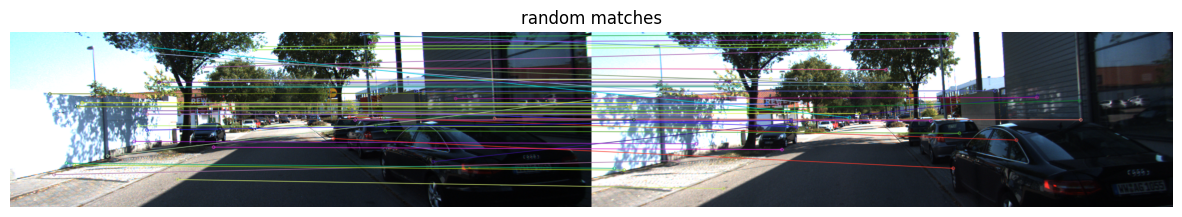

In [143]:
img3 = cv2.drawMatches(l01,kp_l01,r02,kp_r02,random.sample(matches, len(matches))[:50],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
 

plt.figure(figsize=(15,16))
plt.imshow(img3[:,:,::-1]), plt.title('random matches')
plt.axis('off')

In [124]:
l1 = np.array([kp_l01[match.queryIdx].pt for match in matches])
l2 = np.array([kp_r02[match.trainIdx].pt for match in matches])

In [126]:
F, mask = cv2.findFundamentalMat(np.array(l1), np.array(l2),method=cv2.FM_8POINT+cv2.FM_RANSAC)
F

array([[ 1.69954810e-07, -3.27526174e-04,  5.04244628e-02],
       [ 3.31020933e-04,  1.01319665e-05, -2.48904372e-01],
       [-5.11249058e-02,  2.41026394e-01,  1.00000000e+00]])

In [128]:
print(f'Nombres de correspondances trouvées: {len(mask)}')
print(f'Nombres de bonnes correspondances : {len(np.argwhere(mask == 1))}')

Nombres de correspondances trouvées: 1586
Nombres de bonnes correspondances : 1039


(-0.5, 2483.5, 374.5, -0.5)

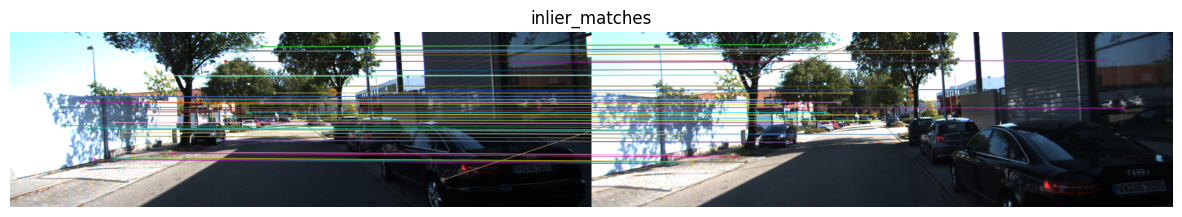

In [142]:
inlier_matches = [matches[i] for i in range(len(matches)) if mask[i]]
img4 = cv2.drawMatches(l01,kp_l01,r02,kp_r02,random.sample(inlier_matches, len(inlier_matches))[:50],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
 

plt.figure(figsize=(15,16))
plt.imshow(img4[:,:,::-1]), plt.title('inlier_matches')
plt.axis('off')

(-0.5, 2483.5, 374.5, -0.5)

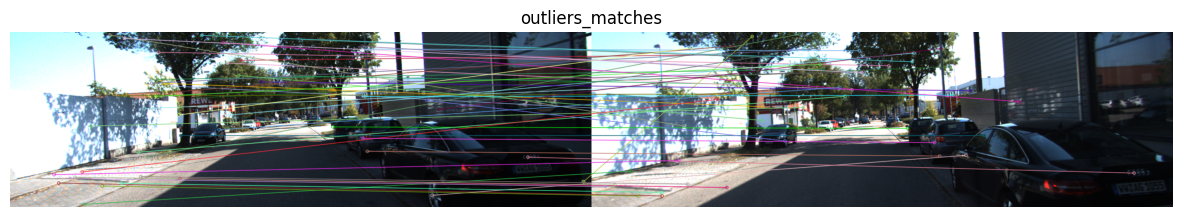

In [140]:
outliers_matches = [matches[i] for i in range(len(matches)) if not mask[i]]
img4 = cv2.drawMatches(l01,kp_l01,r02,kp_r02,random.sample(outliers_matches, len(outliers_matches))[:50],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
 

plt.figure(figsize=(15,16))
plt.imshow(img4[:,:,::-1]), plt.title('outliers_matches')
plt.axis('off')

In [ ]:
l1_h = np.hstack((l1, np.ones((l1.shape[0], 1))))
l2_h = np.hstack((l2, np.ones((l2.shape[0], 1))))

In [136]:
errors = []
for i in range(len(l1_h)):
    x1 = l1_h[i]
    x2 = l2_h[i]
    errors.append(abs(np.dot(x2, np.dot(F, x1))))
    
inlier_errors = [errors[i] for i in range(len(errors)) if mask[i]]
outlier_errors = [errors[i] for i in range(len(errors)) if not mask[i]]

In [139]:
inlier_mean = np.mean(inlier_errors)
inlier_std = np.std(inlier_errors)

outlier_mean = np.mean(outlier_errors)
outlier_std = np.std(outlier_errors)

print(f"inliers : mean = {inlier_mean}, std = {inlier_std}")
print(f"outliers : mean = {outlier_mean}, std = {outlier_std}")

inliers : mean = 0.09326900224250788, std = 0.09328265987727552
outliers : mean = 7.686254491218656, std = 8.542894533067788


In [147]:
print(f'det_mat : {np.linalg.det(F)}')
print(f'rank_mat : {np.linalg.matrix_rank(F)}')

det_mat : 1.1144249098369048e-21
rank_mat : 2
